In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/My Drive/Colab Notebooks/Tensor_decom_sample/data/'

In [4]:
data=pd.read_csv(data_path + 'time_factor.csv')

In [5]:
data.set_index(data.columns[len(data.columns)-1], inplace=True)

In [6]:
data.shape

(837, 151)

In [7]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,...,0.000744,0.001876,-0.002223,-0.000047,0.000021,0.000053,0.001289,0.002182,0.003198,-0.001463
2023-01-02 01:00:00,1,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,...,-0.003467,-0.001129,-0.004367,0.004317,-0.001816,0.001607,0.002705,0.003516,0.002784,0.006375
2023-01-02 02:00:00,2,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,...,-0.000368,-0.000858,-0.001158,-0.000092,0.000104,-0.000196,0.000243,0.000428,-0.000272,0.000085
2023-01-02 03:00:00,3,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,...,-0.000864,0.001292,-0.001400,-0.000894,0.001356,-0.000932,0.001881,0.000127,-0.000685,-0.000623
2023-01-02 04:00:00,4,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,...,-0.001424,0.003336,0.003284,-0.000629,0.001558,-0.003075,-0.001188,-0.003338,-0.001400,0.001917


In [8]:
weather_data = pd.read_csv(data_path + 'we_ev_el.csv')

In [9]:
weather_data.shape

(840, 20)

In [10]:
weather_data.set_index('timestamp', inplace=True)
weather_data.head()

,Unnamed: 0,temperature,precipitation,rainfall,snowfall,cloudcover,wind_speed,wind_direction,date,sunrise_datetime,sunset_datetime,encoding,event_title,event_start_date,event_end_date,event_location,event_latitude,event_longitude,elisabeth_line
timestamp,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,8.1,0.4,0.4,0.0,100,6.6,248,2023-01-02,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
2023-01-02 01:00:00,1,7.8,0.3,0.3,0.0,100,7.2,233,2023-01-02,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
2023-01-02 02:00:00,2,7.5,0.1,0.1,0.0,100,10.4,224,2023-01-02,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
2023-01-02 03:00:00,3,7.3,0.0,0.0,0.0,95,13.6,220,2023-01-02,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
2023-01-02 04:00:00,4,7.1,0.0,0.0,0.0,100,13.8,219,2023-01-02,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True


In [11]:
preprocessed_data = pd.concat([data, weather_data.reindex(data.index)], axis=1)

In [12]:
preprocessed_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,sunrise_datetime,sunset_datetime,encoding,event_title,event_start_date,event_end_date,event_location,event_latitude,event_longitude,elisabeth_line
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,...,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
2023-01-02 01:00:00,1,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,...,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
2023-01-02 02:00:00,2,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,...,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
2023-01-02 03:00:00,3,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,...,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
2023-01-02 04:00:00,4,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,...,2023-01-02 09:06:00,2023-01-02 17:02:00,nighttime,Winter Wonderland,2023-01-02,2023-01-02,Hyde Park,51.507388,-0.165571,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,832,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,...,2023-02-05 08:32:00,2023-02-05 17:56:00,nighttime,NaN,NaN,NaN,NaN,NaN,NaN,True
2023-02-05 20:00:00,833,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,...,2023-02-05 08:32:00,2023-02-05 17:56:00,nighttime,NaN,NaN,NaN,NaN,NaN,NaN,True
2023-02-05 21:00:00,834,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,...,2023-02-05 08:32:00,2023-02-05 17:56:00,nighttime,NaN,NaN,NaN,NaN,NaN,NaN,True


In [13]:
import pandas as pd

In [14]:
preprocessed_data.columns.tolist()

['Unnamed: 0',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',

In [15]:
data_ready = preprocessed_data.drop(columns=['precipitation','date','sunrise_datetime','sunset_datetime','event_start_date','event_end_date','event_start_date','event_location'])

In [16]:
data_ready.rename(columns={"encoding": "daytime"}, inplace=True)

In [17]:
data_ready

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,event_title,event_latitude,event_longitude,elisabeth_line
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,...,0.4,0.0,100,6.6,248,nighttime,Winter Wonderland,51.507388,-0.165571,True
2023-01-02 01:00:00,1,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,...,0.3,0.0,100,7.2,233,nighttime,Winter Wonderland,51.507388,-0.165571,True
2023-01-02 02:00:00,2,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,...,0.1,0.0,100,10.4,224,nighttime,Winter Wonderland,51.507388,-0.165571,True
2023-01-02 03:00:00,3,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,...,0.0,0.0,95,13.6,220,nighttime,Winter Wonderland,51.507388,-0.165571,True
2023-01-02 04:00:00,4,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,...,0.0,0.0,100,13.8,219,nighttime,Winter Wonderland,51.507388,-0.165571,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,832,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,...,0.0,0.0,19,7.8,347,nighttime,NaN,NaN,NaN,True
2023-02-05 20:00:00,833,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,...,0.0,0.0,12,8.3,355,nighttime,NaN,NaN,NaN,True
2023-02-05 21:00:00,834,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,...,0.0,0.0,0,7.9,357,nighttime,NaN,NaN,NaN,True


In [18]:
# South East limits
se_limit_lat = 51.523811 # everthing lower than this value is south east
se_limit_lon = -0.101342 # everything greater than this value is south east

# East limits
e_limit_lat = 51.523811 # everything greater than this value is east
e_limit_lon = -0.022306 # everything greater than this is east

# South West limits
sw_limit_lat = 51.501631 # everthing lower than this value is south east
sw_limit_lon = -0.101342 # everything lower than this value is south east

# West limits
w_limit_lat = 51.501072  # everthing greater than this value is south east
w_limit_lon = -0.182406  # everthing lower than this value is south east

# Central limits
c_toplimit_lat = 51.501072 # everthing greater than this value is central
c_lowlimit_lat = 51.523811 # everything lower than this value is central

c_toplimit_lon = -0.101342 # everything lower than this value is central
c_lowlimit_lon = -0.182406 # everthing greater than this value is central

# North limits
n_toplimit_lon = -0.022306 # everything lower than this value is central
n_lowlimit_lon = -0.182406 # everthing greater than this value is central

n_lowlimit_lat = 51.523811 # everthing greater than this value is central

In [19]:
loc = []

In [20]:
for hour in data_ready.index:
    if data_ready['event_latitude'][hour] > c_toplimit_lat and data_ready['event_latitude'][hour]< c_lowlimit_lat and data_ready['event_longitude'][hour]< c_toplimit_lon and data_ready['event_longitude'][hour]>c_lowlimit_lon:
        loc.append('Central') # Central
    elif data_ready['event_longitude'][hour] < n_toplimit_lon and data_ready['event_longitude'][hour] > n_lowlimit_lon and data_ready['event_latitude'][hour] > n_lowlimit_lat:
        loc.append('North') # North
    elif data_ready['event_longitude'][hour] < w_limit_lon and data_ready['event_latitude'][hour] > w_limit_lat:
        loc.append('West') # West
    elif data_ready['event_longitude'][hour] < sw_limit_lon and data_ready['event_latitude'][hour] < sw_limit_lat:
        loc.append('South_West')  # South_West
    elif data_ready['event_longitude'][hour] > e_limit_lon and data_ready['event_latitude'][hour] > e_limit_lat:
        loc.append('East') # East
    elif data_ready['event_longitude'][hour] > se_limit_lon and data_ready['event_latitude'][hour] < se_limit_lat:
        loc.append('South_East') # South East
    else:
        loc.append('Other')

In [21]:
data_ready['london_zone'] = loc

In [22]:
data_ready

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,snowfall,cloudcover,wind_speed,wind_direction,daytime,event_title,event_latitude,event_longitude,elisabeth_line,london_zone
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,...,0.0,100,6.6,248,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
2023-01-02 01:00:00,1,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,...,0.0,100,7.2,233,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
2023-01-02 02:00:00,2,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,...,0.0,100,10.4,224,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
2023-01-02 03:00:00,3,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,...,0.0,95,13.6,220,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
2023-01-02 04:00:00,4,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,...,0.0,100,13.8,219,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,832,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,...,0.0,19,7.8,347,nighttime,NaN,NaN,NaN,True,Other
2023-02-05 20:00:00,833,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,...,0.0,12,8.3,355,nighttime,NaN,NaN,NaN,True,Other
2023-02-05 21:00:00,834,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,...,0.0,0,7.9,357,nighttime,NaN,NaN,NaN,True,Other


In [23]:
data_ready.event_title.replace(np.nan,'No_Event', inplace=True)

In [24]:
data_ready

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,snowfall,cloudcover,wind_speed,wind_direction,daytime,event_title,event_latitude,event_longitude,elisabeth_line,london_zone
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,...,0.0,100,6.6,248,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
2023-01-02 01:00:00,1,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,...,0.0,100,7.2,233,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
2023-01-02 02:00:00,2,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,...,0.0,100,10.4,224,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
2023-01-02 03:00:00,3,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,...,0.0,95,13.6,220,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
2023-01-02 04:00:00,4,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,...,0.0,100,13.8,219,nighttime,Winter Wonderland,51.507388,-0.165571,True,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,832,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,...,0.0,19,7.8,347,nighttime,No_Event,NaN,NaN,True,Other
2023-02-05 20:00:00,833,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,...,0.0,12,8.3,355,nighttime,No_Event,NaN,NaN,True,Other
2023-02-05 21:00:00,834,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,...,0.0,0,7.9,357,nighttime,No_Event,NaN,NaN,True,Other


In [25]:
data_ready.drop(columns=['event_latitude','event_longitude'], inplace=True)

In [26]:
data_ready

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,event_title,elisabeth_line,london_zone
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,...,8.1,0.4,0.0,100,6.6,248,nighttime,Winter Wonderland,True,Central
2023-01-02 01:00:00,1,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,...,7.8,0.3,0.0,100,7.2,233,nighttime,Winter Wonderland,True,Central
2023-01-02 02:00:00,2,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,...,7.5,0.1,0.0,100,10.4,224,nighttime,Winter Wonderland,True,Central
2023-01-02 03:00:00,3,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,...,7.3,0.0,0.0,95,13.6,220,nighttime,Winter Wonderland,True,Central
2023-01-02 04:00:00,4,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,...,7.1,0.0,0.0,100,13.8,219,nighttime,Winter Wonderland,True,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,832,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,...,4.9,0.0,0.0,19,7.8,347,nighttime,No_Event,True,Other
2023-02-05 20:00:00,833,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,...,2.9,0.0,0.0,12,8.3,355,nighttime,No_Event,True,Other
2023-02-05 21:00:00,834,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,...,1.8,0.0,0.0,0,7.9,357,nighttime,No_Event,True,Other


<Axes: >

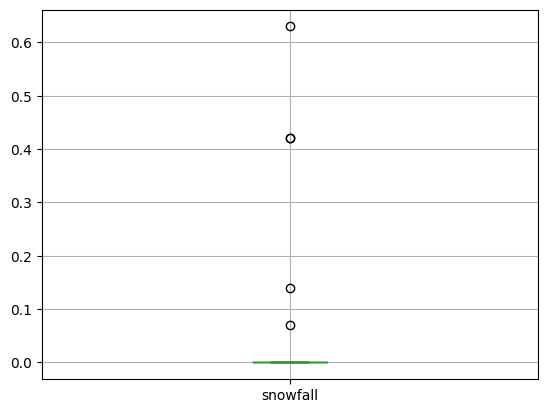

In [27]:
data_ready[['snowfall']].boxplot()

In [28]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False)

In [29]:
# Fit encoder
ohe.fit(data_ready[['daytime','event_title','london_zone']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [37]:
# Transform the current "Street" column
ohe.transform(data_ready[['daytime','event_title','london_zone']]).shape

(837, 6)

In [41]:
data_ready[ohe.get_feature_names_out()]=ohe.transform(data_ready[['daytime','event_title','london_zone']])

In [42]:
data_ready

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,daytime,event_title,elisabeth_line,london_zone,daytime_daytime,daytime_nighttime,event_title_No_Event,event_title_Winter Wonderland,london_zone_Central,london_zone_Other
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,...,nighttime,Winter Wonderland,True,Central,0.0,1.0,0.0,1.0,1.0,0.0
2023-01-02 01:00:00,1,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,...,nighttime,Winter Wonderland,True,Central,0.0,1.0,0.0,1.0,1.0,0.0
2023-01-02 02:00:00,2,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,...,nighttime,Winter Wonderland,True,Central,0.0,1.0,0.0,1.0,1.0,0.0
2023-01-02 03:00:00,3,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,...,nighttime,Winter Wonderland,True,Central,0.0,1.0,0.0,1.0,1.0,0.0
2023-01-02 04:00:00,4,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,...,nighttime,Winter Wonderland,True,Central,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,832,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,...,nighttime,No_Event,True,Other,0.0,1.0,1.0,0.0,0.0,1.0
2023-02-05 20:00:00,833,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,...,nighttime,No_Event,True,Other,0.0,1.0,1.0,0.0,0.0,1.0
2023-02-05 21:00:00,834,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,...,nighttime,No_Event,True,Other,0.0,1.0,1.0,0.0,0.0,1.0


In [66]:
data_preproc = data_ready.drop(columns=['daytime','event_title','london_zone','daytime_nighttime',data_ready.columns[0]])

In [67]:
data_preproc

,0,1,2,3,4,5,6,7,8,9,...,snowfall,cloudcover,wind_speed,wind_direction,elisabeth_line,daytime_daytime,event_title_No_Event,event_title_Winter Wonderland,london_zone_Central,london_zone_Other
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,-0.000039,...,0.0,100,6.6,248,True,0.0,0.0,1.0,1.0,0.0
2023-01-02 01:00:00,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,0.000194,...,0.0,100,7.2,233,True,0.0,0.0,1.0,1.0,0.0
2023-01-02 02:00:00,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,-0.000123,...,0.0,100,10.4,224,True,0.0,0.0,1.0,1.0,0.0
2023-01-02 03:00:00,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,-0.000122,...,0.0,95,13.6,220,True,0.0,0.0,1.0,1.0,0.0
2023-01-02 04:00:00,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,-0.000651,...,0.0,100,13.8,219,True,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,-0.002347,...,0.0,19,7.8,347,True,0.0,1.0,0.0,0.0,1.0
2023-02-05 20:00:00,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,-0.005284,...,0.0,12,8.3,355,True,0.0,1.0,0.0,0.0,1.0
2023-02-05 21:00:00,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,0.000391,...,0.0,0,7.9,357,True,0.0,1.0,0.0,0.0,1.0


In [68]:
data_preproc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 2023-01-02 00:00:00 to 2023-02-05 23:00:00
Data columns (total 162 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    0                              float64
 1    1                              float64
 2    2                              float64
 3    3                              float64
 4    4                              float64
 5    5                              float64
 6    6                              float64
 7    7                              float64
 8    8                              float64
 9    9                              float64
 10   10                             float64
 11   11                             float64
 12   12                             float64
 13   13                             float64
 14   14                             float64
 15   15                             float64
 16   16                             float64
 17   17  

In [69]:
data_preproc.columns[:149]

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '139', '140', '141', '142', '143', '144', '145', '146', '147', '148'],
      dtype='object', length=149)

In [70]:
import seaborn as sns

In [71]:
#Partial correlation
part_data =  data_preproc.drop(columns=data_preproc.columns[:150])
part_data

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,elisabeth_line,daytime_daytime,event_title_No_Event,event_title_Winter Wonderland,london_zone_Central,london_zone_Other
timestamp,,,,,,,,,,,,
2023-01-02 00:00:00,8.1,0.4,0.0,100,6.6,248,True,0.0,0.0,1.0,1.0,0.0
2023-01-02 01:00:00,7.8,0.3,0.0,100,7.2,233,True,0.0,0.0,1.0,1.0,0.0
2023-01-02 02:00:00,7.5,0.1,0.0,100,10.4,224,True,0.0,0.0,1.0,1.0,0.0
2023-01-02 03:00:00,7.3,0.0,0.0,95,13.6,220,True,0.0,0.0,1.0,1.0,0.0
2023-01-02 04:00:00,7.1,0.0,0.0,100,13.8,219,True,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,4.9,0.0,0.0,19,7.8,347,True,0.0,1.0,0.0,0.0,1.0
2023-02-05 20:00:00,2.9,0.0,0.0,12,8.3,355,True,0.0,1.0,0.0,0.0,1.0
2023-02-05 21:00:00,1.8,0.0,0.0,0,7.9,357,True,0.0,1.0,0.0,0.0,1.0


In [74]:
data_preproc['elisabeth_line'] = data_preproc['elisabeth_line']*1

In [75]:
data_preproc

,0,1,2,3,4,5,6,7,8,9,...,snowfall,cloudcover,wind_speed,wind_direction,elisabeth_line,daytime_daytime,event_title_No_Event,event_title_Winter Wonderland,london_zone_Central,london_zone_Other
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,-0.000039,...,0.0,100,6.6,248,1,0.0,0.0,1.0,1.0,0.0
2023-01-02 01:00:00,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,0.000194,...,0.0,100,7.2,233,1,0.0,0.0,1.0,1.0,0.0
2023-01-02 02:00:00,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,-0.000123,...,0.0,100,10.4,224,1,0.0,0.0,1.0,1.0,0.0
2023-01-02 03:00:00,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,-0.000122,...,0.0,95,13.6,220,1,0.0,0.0,1.0,1.0,0.0
2023-01-02 04:00:00,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,-0.000651,...,0.0,100,13.8,219,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,-0.002347,...,0.0,19,7.8,347,1,0.0,1.0,0.0,0.0,1.0
2023-02-05 20:00:00,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,-0.005284,...,0.0,12,8.3,355,1,0.0,1.0,0.0,0.0,1.0
2023-02-05 21:00:00,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,0.000391,...,0.0,0,7.9,357,1,0.0,1.0,0.0,0.0,1.0


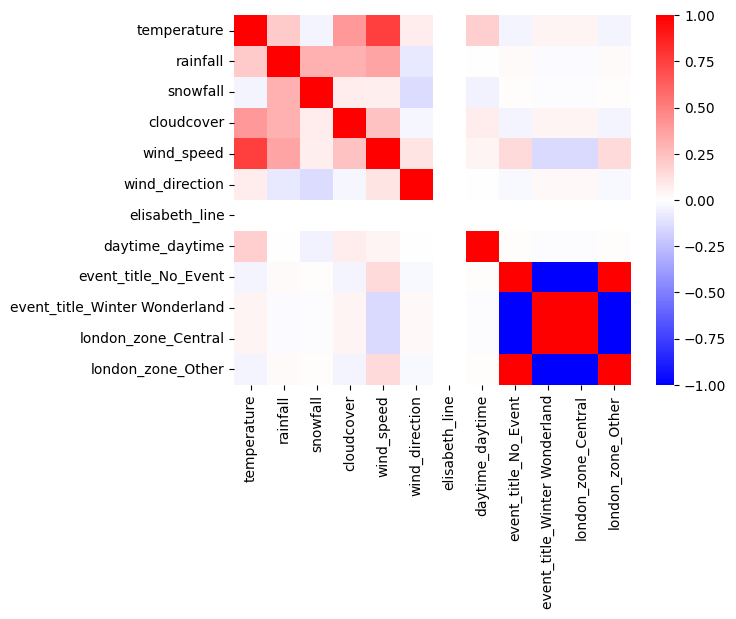

In [72]:
# Heatmap of pairwise correlations
correlation_matrix = part_data.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [80]:
y_columns = data_preproc.columns[:150]
y_columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '140', '141', '142', '143', '144', '145', '146', '147', '148', '149'],
      dtype='object', length=150)

In [82]:
X_columns = data_preproc.columns[150:]
X_columns

Index(['temperature', 'rainfall', 'snowfall', 'cloudcover', 'wind_speed',
       'wind_direction', 'elisabeth_line', 'daytime_daytime',
       'event_title_No_Event', 'event_title_Winter Wonderland',
       'london_zone_Central', 'london_zone_Other'],
      dtype='object')

In [86]:
y = data_preproc[y_columns]

In [87]:
y

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0.001127,-0.000818,0.000259,-0.001494,-0.000434,-0.000474,0.000100,-0.000533,-0.000147,-0.000039,...,0.000744,0.001876,-0.002223,-0.000047,0.000021,0.000053,0.001289,0.002182,0.003198,-0.001463
2023-01-02 01:00:00,0.001294,-0.001260,-0.000131,-0.002231,0.000634,-0.000598,0.000947,0.000292,0.000816,0.000194,...,-0.003467,-0.001129,-0.004367,0.004317,-0.001816,0.001607,0.002705,0.003516,0.002784,0.006375
2023-01-02 02:00:00,0.000422,-0.000284,-0.000141,-0.000485,-0.000049,-0.000189,-0.000146,0.000188,-0.000366,-0.000123,...,-0.000368,-0.000858,-0.001158,-0.000092,0.000104,-0.000196,0.000243,0.000428,-0.000272,0.000085
2023-01-02 03:00:00,0.000538,-0.000388,-0.000378,-0.000851,-0.000236,-0.000179,0.000223,0.000315,-0.000086,-0.000122,...,-0.000864,0.001292,-0.001400,-0.000894,0.001356,-0.000932,0.001881,0.000127,-0.000685,-0.000623
2023-01-02 04:00:00,0.000770,-0.000947,0.000542,-0.001719,-0.001337,0.004495,0.003201,0.000767,-0.000484,-0.000651,...,-0.001424,0.003336,0.003284,-0.000629,0.001558,-0.003075,-0.001188,-0.003338,-0.001400,0.001917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,0.016766,-0.010847,-0.007157,-0.029272,-0.009435,-0.003998,-0.000874,0.010418,-0.011304,-0.002347,...,-0.011256,0.017531,0.012073,-0.015253,-0.018938,0.007022,-0.020091,0.026340,-0.004172,0.002403
2023-02-05 20:00:00,0.010156,-0.009663,-0.003885,-0.016326,-0.012273,-0.002575,0.007432,0.007785,-0.005766,-0.005284,...,-0.012983,-0.003887,-0.020068,0.007050,0.003497,0.008260,0.004292,-0.000353,0.003444,-0.010244
2023-02-05 21:00:00,0.007354,-0.007184,-0.000883,-0.012060,-0.007233,0.000954,-0.000154,0.002802,-0.000847,0.000391,...,0.000689,-0.009618,0.006889,0.002729,-0.006616,-0.016790,0.019729,0.004132,0.007474,-0.021722


In [88]:
X = data_preproc[X_columns]
X

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,elisabeth_line,daytime_daytime,event_title_No_Event,event_title_Winter Wonderland,london_zone_Central,london_zone_Other
timestamp,,,,,,,,,,,,
2023-01-02 00:00:00,8.1,0.4,0.0,100,6.6,248,1,0.0,0.0,1.0,1.0,0.0
2023-01-02 01:00:00,7.8,0.3,0.0,100,7.2,233,1,0.0,0.0,1.0,1.0,0.0
2023-01-02 02:00:00,7.5,0.1,0.0,100,10.4,224,1,0.0,0.0,1.0,1.0,0.0
2023-01-02 03:00:00,7.3,0.0,0.0,95,13.6,220,1,0.0,0.0,1.0,1.0,0.0
2023-01-02 04:00:00,7.1,0.0,0.0,100,13.8,219,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05 19:00:00,4.9,0.0,0.0,19,7.8,347,1,0.0,1.0,0.0,0.0,1.0
2023-02-05 20:00:00,2.9,0.0,0.0,12,8.3,355,1,0.0,1.0,0.0,0.0,1.0
2023-02-05 21:00:00,1.8,0.0,0.0,0,7.9,357,1,0.0,1.0,0.0,0.0,1.0


In [94]:
X.shape

(837, 12)

In [96]:
y.shape

(837, 150)

In [89]:
# 0- Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [99]:
# 1- RNN Architecture
model = Sequential()
model.add(layers.SimpleRNN(units=2, activation='tanh', input_shape=(837,12)))
model.add(layers.Dense(150, activation="linear"))

In [92]:
# 2- Compilation
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.5)) # very high lr so we can converge with such a small dataset

In [93]:
# 3- Fit
model.fit(X, y, epochs=10, verbose=0)

ValueError: ignored